# PROYECTO SPRINT 7: RECOPILACION DE ALMACENAMIENTO DE DATOS (SQL)

## 1.- Importacion de Bibliotecas

In [39]:
import pandas as pd
import numpy as np
from scipy import stats as st
from functools import reduce
from matplotlib import pyplot as plt
import seaborn as sns
import plotly_express as px 

## 2.- Estudio de Datos.
### 2.1.- Trabajo de Datos.

In [45]:
company_trips = pd.read_csv('moved_project_sql_result_01.csv')
#display(company_trips.head())
company_trips.info()
print('==============')
print()
trips_per_loc = pd.read_csv('moved_project_sql_result_04.csv')
trips_per_loc['average_trips'] = np.floor(trips_per_loc['average_trips']).astype(int)
#display(trips_per_loc.head())
trips_per_loc.info()
print('==============')
print()

trip_info = pd.read_csv('moved_project_sql_result_07.csv')
trip_info['duration_minutes'] = (trip_info['duration_seconds']/60).round(2)

#display(trip_info.head())
trip_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_second

In [41]:
print(f'El dataframe "company_trips" tiene valores ausentes?:\n{company_trips.isna().sum()}')
print()
print(f'El dataframe "trips_per_loc" tiene valores ausentes?:\n{trips_per_loc.isna().sum()}')
print()
print(f'El dataframe "trip_info" tiene valores ausentes?:\n{trip_info.isna().sum()}')


El dataframe "company_trips" tiene valores ausentes?:
company_name    0
trips_amount    0
dtype: int64

El dataframe "trips_per_loc" tiene valores ausentes?:
dropoff_location_name    0
average_trips            0
dtype: int64

El dataframe "trip_info" tiene valores ausentes?:
start_ts              0
weather_conditions    0
duration_seconds      0
duration_minutes      0
dtype: int64


## 3.- Representacion de datos mediante Graficos.

### 3.1.- Top 10 Barrios con viajes finalizados.

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


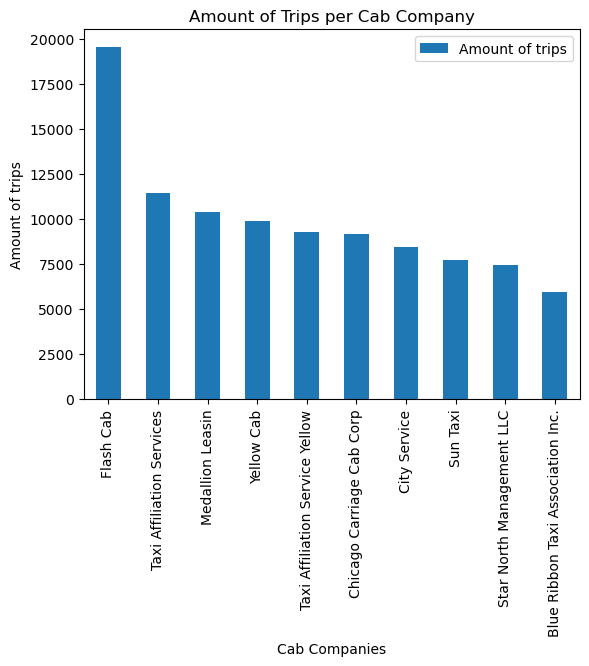

In [42]:
company_trips.sort_values(['trips_amount'], ascending=False).head(10).plot(
    kind='bar',
    x='company_name',
    y='trips_amount',
    xlabel='Cab Companies',
    ylabel='Amount of trips',
    title='Amount of Trips per Cab Company'
)
plt.legend(['Amount of trips'])
plt.show()

### Conclusion 3.1.
#### Las top 10 companias de taxis en chicago con mayores viajes terminados son:
1. Flash Cab
2. Taxi Affiliation Services
3. Medallion Leasin
4. Yellow Cab
5. Taxi Affiliation Service Yellow
6. Chicago Carriage Corp
7. City Service
8. Sun Taxi
9. Star North Management LLC
10. Blue Ribbon Taxi Association Inc.


### 3.2.- Top 10 de Barrios con mayores viajes finalizados

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
...,...,...
89,Mount Greenwood,3
90,Hegewisch,3
91,Burnside,2
92,East Side,1


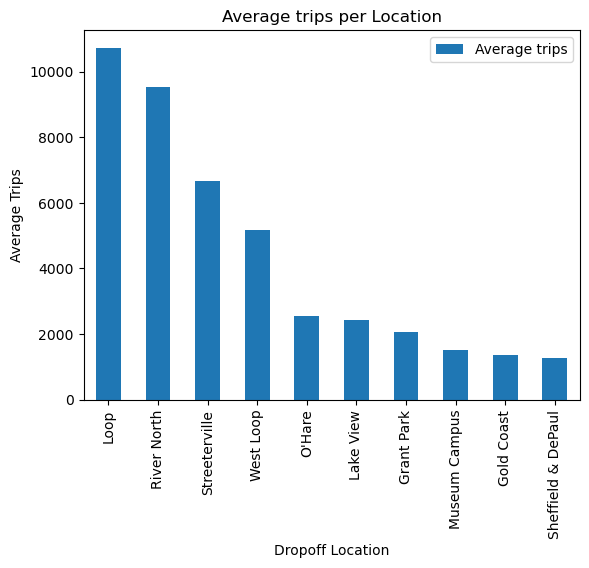

In [43]:
trips_per_loc.sort_values(['average_trips'], ascending=False).head(10).plot(
    kind='bar',
    x='dropoff_location_name',
    y='average_trips',
    xlabel='Dropoff Location',
    ylabel='Average Trips',
    title='Average trips per Location'
)
plt.legend(['Average trips'])
plt.show()

### Conclusion 3.2.
#### Las top 10 ubicaciones de chicago con mayores viajes por promedio son:
1. Loop
2. River North
3. Streeterville
4. West Loop
5. O'Hare
6. Lake View
7. Grant Park
8. Museum Campus
9. Gold Coast
10. Sheffield & DePaul

In [46]:
display(trip_info)
trip_info.info()
trip_info['start_ts'] = pd.to_datetime(trip_info['start_ts'])
trip_info.info()
trip_info['Trip_DoW'] = trip_info['start_ts'].dt.day_of_week
display(trip_info['Trip_DoW'].value_counts())

,start_ts,weather_conditions,duration_seconds,duration_minutes
0,2017-11-25 16:00:00,Good,2410.0,40.17
1,2017-11-25 14:00:00,Good,1920.0,32.00
2,2017-11-25 12:00:00,Good,1543.0,25.72
3,2017-11-04 10:00:00,Good,2512.0,41.87
4,2017-11-11 07:00:00,Good,1440.0,24.00
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,0.00
1064,2017-11-11 10:00:00,Good,1318.0,21.97
1065,2017-11-11 13:00:00,Good,2100.0,35.00
1066,2017-11-11 08:00:00,Good,1380.0,23.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
 3   duration_minutes    1068 non-null   float64
dtypes: float64(2), object(2)
memory usage: 33.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   duration_minutes    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 33.5+ KB


Trip_DoW
5    1068
Name: count, dtype: int64

#### Segun lo estudiado, todos los dias de la tabla de viajes hacia O'Hare hasta el Aeropuerto Internacional son en dia Sabado.

###### Nota: Se me habia olvidado que en SQL sacamos la informacion unicamente de los dias sabados, pero al menos ahora aprendi a utilizar de otras maneras pd.to_datetime

## 4.- Prueba de hipotesis nula: 'La duracion promedio de los viajes desde el Loop hasta el Aeropuerto Internacion O'Hare son diferentes'

In [60]:
print('La hipotesis nula es que la duracion promedio de los viajes desde el Loop hasta el Aeropuerto Internacion OHare son diferentes')
print()
print()
good_trip = trip_info[(trip_info['weather_conditions']== 'Good')]
#display(good_trip)

bad_trip = trip_info[(trip_info['weather_conditions']== 'Bad')]
#display(bad_trip)

good_trip_s = pd.Series(good_trip['duration_minutes'])
print(f'La Varianza de "good_trip" es:{np.var(good_trip_s)}')
bad_trip_s = pd.Series(bad_trip['duration_minutes'])
print(f'La Varianza de "bad_trip" es:{np.var(bad_trip_s)}')
alpha = 0.05
results = st.ttest_ind(good_trip_s,bad_trip_s,equal_var=False)
print('valor-p: ', results.pvalue)


if (results.pvalue < alpha) and (good_trip_s.mean() != bad_trip_s.mean()):
    print('Rechazamos la hipotesis nula.')
else:
    print('No podemos rechazar la hipotesis nula.')

La hipotesis nula es que la duracion promedio de los viajes desde el Loop hasta el Aeropuerto Internacion OHare son diferentes


La Varianza de "good_trip" es:159.92597022753358
La Varianza de "bad_trip" es:143.7244311111111
valor-p:  6.742535063892503e-12
Rechazamos la hipotesis nula.


### Conclusion Hipotesis
La hipotesis nula es rechazada, dando a entender que el clima no afecta directamente el flujo de trafico desde Loop hasta el Aeropuerto internacional de O'Hare en los dias Sabados. Podria deberse a que la poblacion esta acostumbrada a los cambios climaticos de la zona que podrian pasar de un dia despejado hasta nieve gruesa o nieve negra siendo mas aptos para conducir en estas condiciones. a su vez las regulaciones de trafico en USA son mas estrictas por lo que la velocidad maxima del trayecto no varia, limitando la ventaja de velocidad en dias despejados.